<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h1 style="text-align: center;"><b>«Проверка статистических гипотез »</b>


# Критерии для проверки гипотез


* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>


* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>


* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>
Распределение выборок должно быть близко к нормальному.<br>
  * Для несвязных выборок: [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).<br>
  * Для связных выборок: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).<br>
  

* Проверка гипотезы о равенстве медиан.<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>


* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>


* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для непрерыных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для дискретных величин: корреляция Спирмена [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html).<br>


Большинство из этих функций вовзращает два значения (бывает и больше). Но всегда первое из них -- значение статистики критерия, второе -- p-value. Нам будет интересно именно p-value.

Замечание. В реализациях критериев Стьюдента и Манна-Уитни-Уилкоксона нет возможности задать одностороннюю альтернативную гипотезу. В этих случаях нулевую гипотезу нужно отвергать, если $\frac{\text{p-value}}{2} < \alpha$.

# Полезные ссылки

Здесь хорошо рассказывается про нормальное распределение, но на английском
- https://www.mathsisfun.com/data/standard-normal-distribution.html

Пример построения - доска Гальтона
- https://www.mathsisfun.com/data/quincunx.html

Визуализация доверительных интервалов
- https://rpsychologist.com/d3/ci/


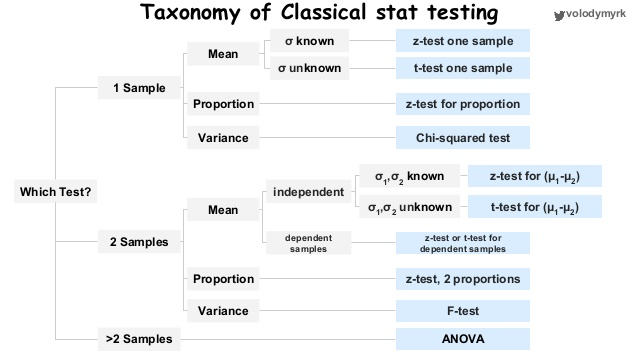

In [1]:
from IPython.display import Image
# https://www.slideshare.net/vladimirkazantsev/how-to-concludeonlineexperimentsinpython
# Напоминалка, указывающая, к какому тесту обратиться
Image("stat_tests.jpg")

# Пример 1. Проверка нормальности распределения


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats # Здесь сидят функции проверки гипотез
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('town_1959_2.csv', encoding='cp1251') #перепись населения 1959
df = df.set_index(u'номер')

In [4]:
df.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


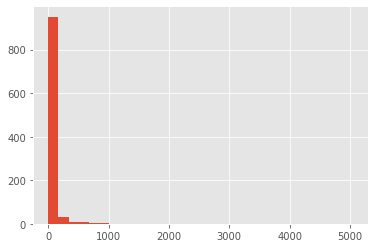

In [5]:
# В крупном столбике сидят мелкие города, а крупные правее
plt.hist((df[u'население']), bins=30);

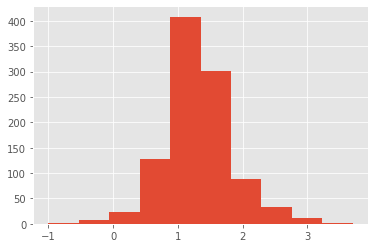

In [6]:
plt.hist(np.log10(df[u'население']));
# Само население может быть и не нормально распределено.
# Поэтому мы хотим посмотреть на логарифм исследуемой величины, который может быть распределён по нормальному закону.

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>

In [7]:
# тест Шапиро-Уилка Н0 - данные нормальные; Н1 - данные не нормальные.
res = stats.shapiro(np.log10(df[u'население']))
# На 0 месте значение статистики, а на 1 месте всегда p-value
print('p-value: {0}'.format(res[1]))

p-value: 3.1486824866172602e-12


p-value получился маленьким (меньше $\alpha = 0.01, 0.05$). А почему получилось не нормальное распределение? Гистограмма же была колоколообразной. Дело в том, что на первой гистограмме мы выбрали слишком маленькое количество бинов.

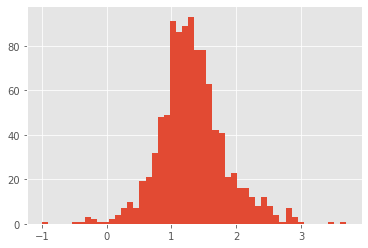

In [8]:
# взяли слишком большую ширину столбиков
plt.hist(np.log10(df[u'население']), bins=50);

In [9]:
# выброс слева
df.sort_values(by=['население']).head(5)

,город,население
номер,,
1 004,Вуктыл,0.1
1 003,Надым,0.3
1 002,Мегион,0.4
999,Нерюнгри,0.5
1 001,Ясный,0.5


In [10]:
# выбросы справа
df.sort_values(by=['население']).tail(2)  

,город,население
номер,,
2,Санкт-Петербург,3003.0
1,Москва,5046.0


Если убрать эти выбросы, то тест всё равно не покажет нормальности распределения, поскольку центральные столбцы цересчур высоки.

В таком случае решение о применении t-теста лежит на исследователе.

Пример 2. Дома в Альбукерке (на углу VS не на углу)
===============

Мы занимаемся продажей домов.  Ассоциация риелторов фиксирует каждую сделку о покупке и продаже дома. Для каждого дома мы знаем: 
- Цена (в сотнях долларов)
- Площадь (в футах квадратных)
- Возраст
- Количество дополнительных удобств (посудомоечная машина, холодильник, микроволновая печь, измельчитель, стиральная машина, домофон, окно в крыше, компактор, сушилка, пандус, доступ к кабельному телевидению)
- Расположен в северо-восточном секторе города (престижный район) (Да (1) или Нет (0))
- Изготовлен на заказ
- Расположен на углу 
- Ежегодные налоги за владение домом

В Китае дома на угла пользуются меньшим спросом, считается, что в них скапливается отрицательная энергия. Давайте проверим, есть ли подобное предубеждение в Альбукерке. 

In [11]:
df = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t')

In [12]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


Хотим проверить, что цены домов на углу (```COR = 1```) отличаются от цен домов не на углу (```COR = 0```). Хотим попробовать применить критерий Стьюдента, но для этого нужно:
1. Проверить нормальность данных,
2. Проверить равенство дисперсий.

Очевидно, что значение -9999 здесь употребляется в качестве пустого значения. Нужно заменить его на корректное пустое значение.

In [13]:
# nan - объект, который обозначает пропущенные значения
df = df.replace(-9999, np.nan)

In [14]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [15]:
x = df[df['COR'] == 1]['PRICE']
y = df[df['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner'

Проверяем нормальность распределений. Заодно покажем, как определять и вызывать функции в python.

In [16]:
# Создадим простую функцию для визуализации распределения пары выборок.
def two_histograms(x, y):
    # После определения функции полезно бывает добавить её описание в таком стиле.
    # Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    # alpha - прозрачность, weights - позволяет задать веса, по которым мы строим гистограмму.
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))  
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

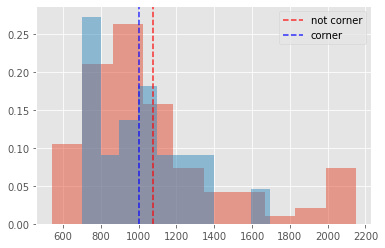

In [17]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(y, x)

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Можно было бы попробовать избавиться от них, но первой (синей) гистограмме это не поможет - выброс у неё всего один, и его удаление не сделает данные более нормальными: слишком уж большой крайний левый столбик. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (дома). Поэтому нам остаётся критерий Манна-Уитни.

- парные выборки - две выборки набираются таким образом, что с каждым наблюдением одной выборки сопоставлено наблюдение другой выборки;

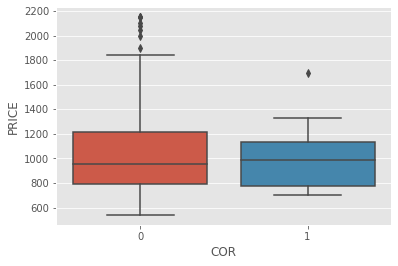

In [18]:
# За одно посмотрим на "ящики с усами", поскольку в нашей визуализации из нет (для большей читаемости)
sns.boxplot(
    x='COR',
    y='PRICE',
    data=df
);

Такой график сразу даёт исследователю некоторую информацию. Судя по нему, медиана будет отличаться статистически незначимо. 
Так же можно сделать вывод, что среди угловых домов редко встречаются очень дорогие.

* Проверка гипотезы о равенстве медиан.<br>
H0: $m_1 = m_2$<br>
H1: $m_1 \ne m_2$<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>

In [19]:
# Гипотеза - значимо ли отличие цен домов на углу и не на углу
# Используем критерий Манна-Уитни - непарный (Можно и Уилкоксона, поскольку выборка парная)
res = stats.mannwhitneyu(x, y, alternative="two-sided")
# "less", "greater" x>y или x<y
print('p-value: {0}'.format(res[1]))

p-value: 0.8044081572425339


p-value получилось большим, поэтому у нас нет оснований отвергнуть гипотезу. Вывод: цены домов различаются незначимо - разница медиан в выборках случайна.

# Пример 3. Дома в Альбукерке (северо-восток VS остальные)


<div class="alert alert-info">
<b>Задача 1: </b>
    
Написать мини-функцию, поясняющую результат теста
</div>

Когда множество раз приходится повторять какое-то действие, появляется желание его автоматизировать. 

Реализовать такую функцию можно разными способами. Самый простой: сравнивать с 0.05 и выводить надписть, принимается ли H1 или нет оснований отвергнуть H0.

Предлагаю реализовать несколько сложнее, с возможностью указывать уровень значимости, а быть может и дополнительным сообщением, насколько сильным было отклонение от заданного показателя. 

In [20]:
# Ваш код...

<div class="alert alert-info">
<b>Задача 2: </b>
    
Проанализировать цены на дома на северо-восток и остальные, сделать гипотезы по графикам, проверить их соответствующими тестами (помним про критерий Муда scipy.stats.median_test )
</div>

In [21]:
# Ваш код...

<div class="alert alert-info">
<b>* Задача 3 *: </b>
    
Сделать выводы о цене относительно количества удобств. (поправка Бонферрони, сделайте выводы без неё и проверьте, останутся ли они верны после)
    
    
Собрать и обосновать наиболее удачную конфигурацию дома (представьте, что будете рекламировать клиенту дом, указывая, чем он так хорош), учитываю как цену, так и ежегодные налоги. 
</div>

In [22]:
# Ваш код...

Пример 4. Возраст, в котором умирают европейские аристократы.
=====================

Интересный датасет середины 19 века. Данные о возрасте, в котором умирали европейцы, в зависимости от их класса (sovereignty, aristocracy, and gentry).

In [23]:
df = pd.read_csv('agedeath.dat.txt', sep='\s+', header=None,
                 names=['group', 'age', 'index'])  # сословие, возраст, номер
# sep='\s+' - в качестве разделителя мы выбираем любое число пробелов

In [24]:
df.head()

,group,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5


In [25]:
x = df[df['group'] == 'sovr']['age']
y = df[df['group'] == 'aris']['age']
x.name, y.name = 'sovr', 'aris'

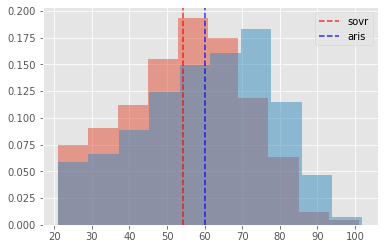

In [26]:
two_histograms(x, y)

Данные условно нормальны. Проверим c помощью критерия Флигнера-Килина, равны ли дисперсии, поскольку t-test хочет еще и с равными дисперсиями данные. 

Почему не F-критерий Фишера? Потому что он очень серьёзно относиться к нормальному распределению данных. 

* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>

In [27]:
res = stats.fligner(x, y)
print('p-value: {0}'.format(res[1]))

p-value: 0.00010116077103844913


Значение p-value низкое, поэтому гипотезу о равенстве дисперсий отвергаем. В двух выборках находятся разные наблюдаемые объекты, то есть выборки ```несвязные```. 

Итого, гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=False```.

In [28]:
res = stats.ttest_ind(x, y, equal_var=False)
print('p-value: {0}'.format(res[1]))

p-value: 1.5181184197728794e-26


<div class="alert alert-info">
<b>Задача 1: </b>
    
Интерпретация результатов
</div>

После проверки гипотезы необходимо произвести интерпритацию результатов, поскольку задача предполагает решение некой проблемы или ответ на определённый вопрос.  
Какой же вывод мы можем сделать, основываясь на полученных результатах? 

In [29]:
# Ваш код...

<div class="alert alert-info">
<b>* Задача 2 *: </b>
    
Сделать выводы о всех трёх группах. (помним про множественные сравнения)
</div>

# Пример 5. Чтение названий цветов


Датасет от исследования 1935 года, в котором изучалась скорость чтения названий цветов в зависимости от того, шрифт какого цвета использовался.

- DiffCol - названия цветов писались разным цветом
- Black - использовался чёрный цвет

In [30]:
df = pd.read_csv('interference.csv')

In [31]:
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


In [32]:
x = df['DiffCol']
y = df['Black']
x.name, y.name = 'DiffCol', 'Black'

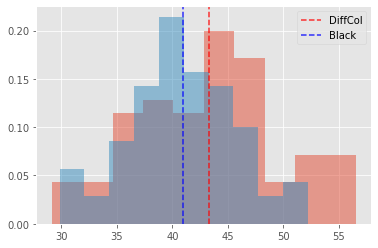

In [33]:
two_histograms(x, y)

Распределения ```условно нормальны```, т.е. здесь не наблюдается существенных отклонений от нормальности.  

Поскольку в наблюдениях содержатся одни и те же люди, которых просили прочитать различные шрифты, поэтому выбоки у нас связные, а значит используем ```ttest_rel``` - тест Стьюдента, приспособленный для парных выборок.

Выборки ```связные```, поскольку в строке теперь значения соответствуют одному и тому же человеку.  

In [34]:
# Одинаковы ли средние значения. Применяем парный t-тест 
res = stats.ttest_rel(x, y)
print('p-value: {0}'.format(res[1]))

p-value: 0.0162416779538072


p-value получился довольно низким, но возможно не таким низким, как хотелось бы. На уровне значимости 0.05 гипотеза будет отвергнута, но на уровне 0.01 уже нет. 

Решение за исследователем. Всё зависит от того, насколько сильно мы боимся ошибки первого рода, насколько сильно мы должны ручаться за выводы.

# Пример 6. Популярность кандидата.

В регионе ожидаются выборы. Команда кандидата проводит опрос, в результате которого в поддержку кандидата выказалось 28% из 100 опрошенных в городе и 20% из 100 опрошенных на селе. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли разворачивать дополнительную рекламную кампанию на селе. (Т.е. гипотеза однородности распределения)

Проверять будем критерием хи-квадрат. Сначала построим таблицу сопряжённости.

In [35]:
contingency_table = pd.DataFrame([[28, 72], [20, 80]],
                                 index=['city', 'country'],
                                 columns=['for', 'against'])
contingency_table

,for,against
city,28,72
country,20,80


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>

In [36]:
# Проверяем гипотезу о равенстве доли признака (различимо ли они по-разному голосуют)
res = stats.chi2_contingency(contingency_table)
print('p-value: {0}'.format(res[1]))

p-value: 0.2464701206916715


p-value получился достаточно большим, поэтому оснований отвергнуть гипотезу о равенстве долей нет.

<div class="alert alert-info">
<b>Задание 1: </b>
    
Пусть, вы хотите проверить правда ли эксперт по Data Science таковым является. Вы составили список вопросов, спросили эксперта и случайных прохожих. Количество правильный вопросов по каждому разделу вы записали в таблицу (таблица смежности)

Выясните, исходя из полученных данных, действительно ли перед вами эксперт или он знает не больше, чем случайный прохожий? Сделайте вывод на основании результата. 
    
</div>

In [37]:
contingency_table =\
    pd.DataFrame([[22, 99, 59], [10, 12, 31]],
                 columns=['SQL', 'Machine Learning', 'Analytics'],
                 index=['Эксперт', 'Случайный прохожий'])

print('Таблица сопряжённости')
contingency_table

Таблица сопряжённости


,SQL,Machine Learning,Analytics
Эксперт,22,99,59
Случайный прохожий,10,12,31


# Пример 7. Корреляция цены и площади домов в Альбукерке.


In [38]:
df = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [39]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Проверим очевидный факт, что площадь дома коррелирует с его ценой.

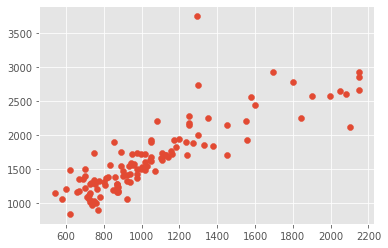

In [40]:
plt.scatter(df['PRICE'], df['SQFT']);

In [41]:
res = stats.pearsonr(df['PRICE'], df['SQFT'])
# Проверяем гипотезу Н0: полное отсутствии корреоляции
print('Коэф. корреляции - Pearson rho: {0}'.format(res[0])) # Коэф. корреляции
print('p-value: {0}'.format(res[1]))

Коэф. корреляции - Pearson rho: 0.8447950985552124
p-value: 5.146345707629025e-33


Гипотезу отвергаем, зависимость есть. 

Бутстреп - бонусный блок
=====

```Бутстреп``` - это техника повторных выборок, которая позволяет получить вместо одного значения статистики по выборке (или выборкам) целое распределение. 

Идея простая. Мы отождествляем имеющуюся выборку с генеральной совокупностью, и тогда мы получаем возможность набрать сколько угодно много новых подвыборок из этой "генеральной совокупности". 

На каждой такой подвыборке можно посчитать значение целевой статистики $\hat\theta$ и вместо одного значения получить бутстреп-распределение этой статистики $\hat\theta_{B}$. 

```Например```, вместо одного среднего значения выборки мы получаем множество  средних значений для каждой из таких подвыборок. Можно использовать это бутстреп-распределение в различных целях. Мы его будем рассматривать применительно к проверке гипотез.
Главное преимущество этого метода в универсальности. Не нужно помнить множество критериев для проверки каждого типа гипотез.

Применение этого приёма будем проводить на искусственной выборке. Сгенерируем выборку ```X``` из нормального распределения $N(0,1)$ на 10000 значений. Этот вектор будем считать настоящей генеральной совокупностью.

In [42]:
np.random.seed(12345)
X = pd.Series(np.random.normal(0, 3, size=10000)) # среднее = 0, дисперсия 3
Y = pd.Series(np.random.normal(1, 3, size=10000))
X.name, Y.name = 'X', 'Y'

-0.03220747334243105
1.002072042381602


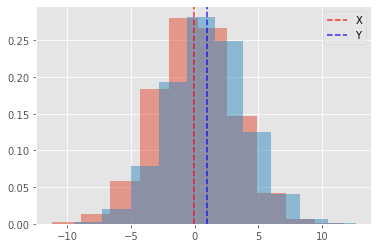

In [43]:
two_histograms(X, Y)
print(X.mean())
print(Y.mean())

Сделаем выборки небольшого размера и будем проверять гипотезу о равенстве средних значений.

In [44]:
np.random.seed(12345)
x = pd.Series(np.random.choice(X, replace=False, size=25)) # случайная выборка из 25 элементов без возвращений replace=False
y = pd.Series(np.random.choice(Y, replace=False, size=25))
x.name, y.name = 'x', 'y'

0.6511708436935965
2.105754710261089


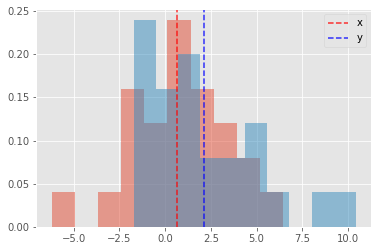

In [45]:
two_histograms(x, y)
print(x.mean())
print(y.mean())

Обратите внимание. Выборки точно принадлежат нормальному распределению, однако формальным признакам они следуют не полностью. 
Так выборка х, согласно критерию Шапиро-Уилка имеет распределение отличное от нормального. В реальности часто распределение именно "похоже" на нормальное, поэтмоу применяются критерии для нормального распределения. Опыт и намётанный глаз помогают эксперту решать, какой критерий применить. 

In [46]:
print('p-value: {0}'.format(stats.shapiro(y)[1])) 

p-value: 0.03916429355740547


In [47]:
stats.ttest_ind(x, y, equal_var=True)  # тест не позволяет отвергнуть гипотезу о равенству средних

Ttest_indResult(statistic=-1.7676672050327216, pvalue=0.0834728070838455)

Побутстрепим выборки ```x``` и ```y```. То есть много раз (порядка 1000-10000) будем делать из них подвыборки  такого же размера с вовращением и для каждой такой подвыборки будем записывать её среднее значение в список ```boot_x``` и ```boot_y``` соответственно. Эти списки будут являться бутстреп-распределениями наших статистик $\hat\theta_{B}^\ast(x), \hat\theta_{B}^\ast(y)$.

In [48]:
boot_x, boot_y = [], []
np.random.seed(12345)
for _ in range(1000):
    # случайно выдёргиваем точки из x и y
    subsample_x = np.random.choice(x, size=len(x), replace=True) 
    subsample_y = np.random.choice(y, size=len(y), replace=True)
    # собраем статистики средних 
    boot_x.append(subsample_x.mean())
    boot_y.append(subsample_y.mean())
boot_x = pd.Series(boot_x, name='boot_x')
boot_y = pd.Series(boot_y, name='boot_y')
boot_x.name, boot_y.name = 'boot_x', 'boot_y'

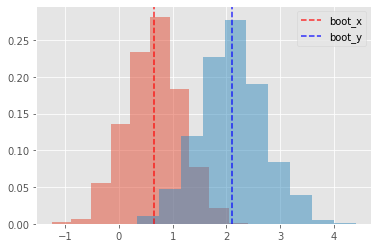

In [49]:
two_histograms(boot_x, boot_y)

Чтобы проверить гипотезу о равенстве средних значений, нужно построить доверительный интервал $(q_{\frac{\alpha}{2}}, q_{1 - \frac{\alpha}{2}})$ для дельты, где $q$ обозначают квантили распределения дельты соответствующего уровня.

95% confidence interval: (-3.055, 0.029)


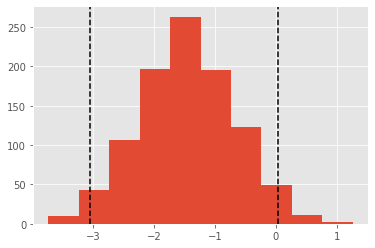

In [50]:
# строим доверительный интервал для парных выборок 
delta = boot_x - boot_y 
q_025 = delta.quantile(0.025)
q_975 = delta.quantile(0.975)
delta.hist()
plt.axvline(q_025, linestyle='dashed', color='black')
plt.axvline(q_975, linestyle='dashed', color='black')
print('95% confidence interval: ({0:.3f}, {1:.3f})'.format(q_025, q_975))

Поскольку ноль попадает в этот интервал, то мы не можем отвергнуть гипотезу H0.

Заметим, что если бы в качестве альтернативной гипотезы H1 мы рассматривали гипотезу $\bar X < \bar Y$, то достаточно было бы одного значения квантиля $1 - q_{\alpha}$, и тогда левый хвост для дельты не был бы нам интересен.

q_95: -0.17350120389127027


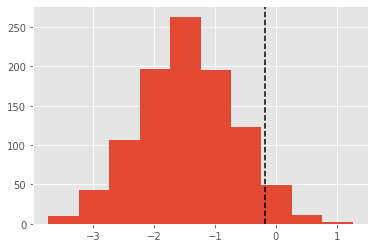

In [51]:
q_095 = delta.quantile(0.95) # гипотеза x<y => правосторонний доверительный интервал
delta.hist()
plt.axvline(q_095, linestyle='dashed', color='black')
print('q_95: {0}'.format(q_095))

В таком случае правая граница интервала уже лежала бы левее нуля, а значит гипотезу H0 мы смогли бы отвергнуть и принять гипотезу H1.

Как в таком случае построить p-value? Это число означает, как часто мы бы неверно отвергали гипотезу H0. То есть нам нужно посчитать долю случаев, где дельта больше нуля.

In [52]:
print('p-value: {0}'.format((delta > 0).mean()))

p-value: 0.027
